In [1]:
import datetime
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Find the transitive closure of a binary relation $R$ on a set $X$, that is the smallest relation on $X$ that contains $R$ and is transitive. For finite sets, we can construct the transitive closure step by step, starting from $R$ and adding all transitive edges that can be constructed from the initial set of relations. For any set $X$, the transitive closure is given by the following expression: $R^+=\bigcup_{i=1}^{\infty}R^i$; In the implementation below when $R=R^i$ the code terminates without being able to add any new transitive edges.

In [2]:
def transitive_closure(X):
    """
    (x, y), (m, n); For y = m add (x, n) below
    """
    R = set(X)
    while True:
        Ri = R.union(set((x,n) for x,y in R for m,n in R if m == y))
        if Ri == R:
            return R
        R = Ri

transitive_closure([(1,2), (2,3), (3,4)])

{(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)}

Design an algorithm that finds the number of ways in which you can traverse $N$ metres by doing 1, 2, 3, 4 or 5 metre lengths. Assume that $N$ can be a very large number. What is the resulting complexity?

In [3]:
def traverse(N):
    jumps = range(1,6)
    jump_options = [list(itertools.permutations(jumps, x)) for x in range(N)]
    jump_options = [item for sublist in jump_options for item in sublist]
    return [x for x in jump_options if sum(x)==N]
traverse(6)

[(1, 5),
 (2, 4),
 (4, 2),
 (5, 1),
 (1, 2, 3),
 (1, 3, 2),
 (2, 1, 3),
 (2, 3, 1),
 (3, 1, 2),
 (3, 2, 1)]

Write an algorithm to merge overlapping intervals:

In [4]:
def merge_intervals(intervals):
    """
    [[1,4], [3,7], [11,17]] -> [[1,7], [11,17]]
    """
    intervals.sort(key=lambda x:x[0])
    result = [intervals[0]]
    for interval in intervals[1:]:
        if interval[0] <= result[-1][1]:
            result[-1][1] = max(result[-1][1], interval[1])
        else:
            result.append(interval)
    return result
merge_intervals([[1,4], [3,7], [11,17]])

[[1, 7], [11, 17]]

From an ordered list of integers without gaps and starting from 2 filter out all non-prime numbers:

In [9]:
def remove_non_primes(l):
    for x in l:
        for y in l:
            if y % x == 0 and x != y:
                l.remove(y)
    return l

remove_non_primes(list(range(2,50)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

A numeric array of length $N$ is given. Design a function that finds all positive numbers in the array that have their opposites in it as well.

In [6]:
def find_opposites(N):
    N = pd.Series(sorted(set(N)))
    vc = N.abs().value_counts() > 1
    return vc.loc[vc].index.to_list()

l = list(np.random.randint(-20, 20, 15))
opp = find_opposites(l)
l, opp

([9, 2, -17, 1, -13, -7, -1, 9, 6, -8, 10, -6, 7, -14, -17], [1, 7, 6])

Suppose we are collecting $n$ cards, where we draw from an infinite pool of uniformly distributed cards. On average how many draws $\sum_{n}{E[X]}$ will it take to collect all $n$ cards?

In [7]:
def sum_expected_vals(n):
    return sum([1 / (1 - x/n) for x in range(n)])

n = 10000
n, np.round(np.log(n), 0), np.round(sum_expected_vals(n), 0), np.round(n * np.log(n), 0), n ** 2

(10000, 9.0, 97876.0, 92103.0, 100000000)

If <b>def f4()</b> gives $\mathcal{U}\{1,2,3,4\}$, write a function <b>def f7()</b> s.t: <br>
1. <b>f7</b> gives a number in $\{3,4,5,6,7\}$ and is $\mathcal{N}(\mu=5)$? <br>
2. <b>f7</b> is $\mathcal{U}\{1,2,3,4,5,6,7\}$?

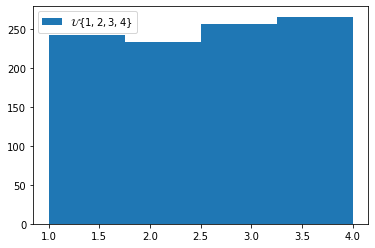

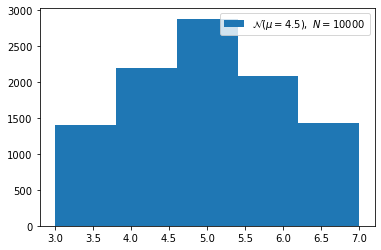

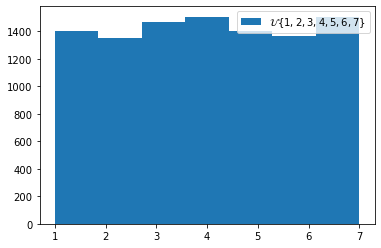

In [15]:
def f4():
    return np.random.randint(1,5)

plt.hist([f4() for x in range(1000)], bins=4, label = '$\mathcal{U}\{1,2,3,4\}$')
plt.legend()
plt.show()

def f7a():
    x = f4() + f4()
    while x > 7 or x == 2:
        x = f4() + f4()
    return x

plt.hist([f7a() for x in range(10000)], bins=5, label = r'$\mathcal{N}(\mu=%.2g),\ N=%d$' % (4.5, 1e4))
plt.legend()
plt.show()

def f7b():
    map7 = dict(zip([tuple(z) for z in [[tuple(y) for y in x] for x in np.split(np.array(list(itertools.product( \
                                                                       range(1,5), range(1,5)))[:-2]), 7)]], range(1,8)))
    f4_tuple = (f4(), f4())
    for x in map7:
        if f4_tuple in x:
            return map7[x]
    else:
        return f7b()

plt.hist([f7b() for x in range(10000)], label = '$\mathcal{U}\{1,2,3,4,5,6,7\}$', bins=7)
plt.legend()
plt.show()